In [92]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [93]:
df = pd.read_csv('dataset.csv')
df.shape

(2919, 13)

In [94]:
df.head(3)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


In [95]:
# performing data cleaning and data preprocessing tasks by checking for duplicates
df.drop_duplicates(inplace=True)
df.shape

(2919, 13)

In [96]:
# dropping unwanted columns
#here we drop the 'Id' column
df.drop(columns=['Id'], inplace=True)
df.head(3)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0


In [97]:
# check for null values
# using .sum() on it to check the count of null values
# we see that maximum number of null values are there in the target column 'SalePrice'
# that should not happen as it affects performance of the model
df.isna().sum()

MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [98]:
# using imputation method with mean strategy to handle null values in target column
# done by means of taking mean of 'SalePrice' column and filling those null values with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df[['SalePrice']])

SimpleImputer()

In [99]:
# mean of 'SalePrice' column
imputer.statistics_

array([180921.19589041])

In [100]:
# applying imputer transformations to dataframe
df['SalePrice'] = imputer.transform(df[['SalePrice']])

In [101]:
# now there are no null values in target column
df.isna().sum()

MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      1
TotalBsmtSF     1
SalePrice       0
dtype: int64

In [102]:
# replace the other nulls with 0 since they are not that important comparatively
df = df.fillna(0)

In [103]:
# all null values in all columns have baan handled
df.isna().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [104]:
# if we study the below description, we see that for 'LotArea' column, there is a huge difference between the 75% of the data (11570.000000) and the max data (215245.000000)
# this means that there are outlayers in that column and we need to handle them as well
df.describe()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.565262,1051.417266,180921.195890
std,42.517628,7886.996359,1.113131,30.291442,20.894344,169.179104,441.120498,56174.332503
min,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,163000.000000
50%,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.000000,180921.195890
75%,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,180921.195890
max,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


<Axes: ylabel='LotArea'>

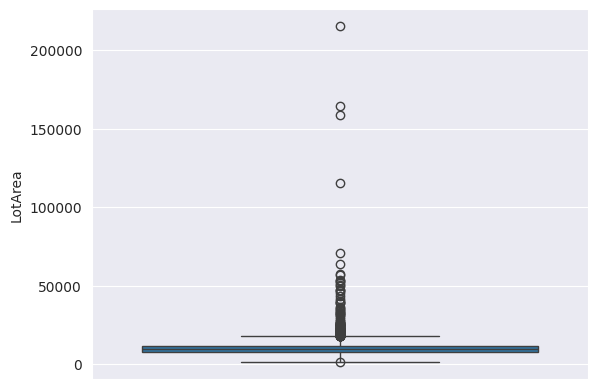

In [105]:
# to look at the outlayers
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.boxplot(df, y='LotArea')

In [106]:
# using IQR (Inter Quartile Range) method to handle the outlayers
import numpy as np

In [107]:
# Quartile 1 (Q1) covers 25% of the data while the Quartile 3 (Q3) covers 75% of the data
Q1 = np.percentile(df['LotArea'], 25, interpolation='midpoint')
Q3 = np.percentile(df['LotArea'], 75, interpolation='midpoint')

In [108]:
# formula to calculate IQR
IQR = Q3 - Q1

In [109]:
# setting thresholds
# anything below lowerbound is outlayer and anything above upperbound is outlayer as well
lowerbound = Q1 - (1.5 * IQR)
upperbound = Q1 + (1.5 * IQR)

In [110]:
# modidying the dataframe with lower and upper bound conditions
df = df[(df.LotArea < upperbound) & (df.LotArea > lowerbound)]

In [111]:
df.shape

(2550, 12)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2550 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2550 non-null   int64  
 1   MSZoning      2550 non-null   object 
 2   LotArea       2550 non-null   int64  
 3   LotConfig     2550 non-null   object 
 4   BldgType      2550 non-null   object 
 5   OverallCond   2550 non-null   int64  
 6   YearBuilt     2550 non-null   int64  
 7   YearRemodAdd  2550 non-null   int64  
 8   Exterior1st   2550 non-null   object 
 9   BsmtFinSF2    2550 non-null   float64
 10  TotalBsmtSF   2550 non-null   float64
 11  SalePrice     2550 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 259.0+ KB


In [113]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000
6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589


In [114]:
# in the dataframe some columns have numerical values while some have categorical values
# ML models cannot deal with categorical values, so we have to take care of that
cat_col = df.select_dtypes('object').columns.tolist()
cat_col

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']

In [115]:
# using OneHotEncoder to deal with categorical columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[cat_col])

OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [116]:
# OneHotEncoder converts your categorical velues into numerical onces but in the form of 0 and 1
# creating new column names based on the working of OneHotEncoder
encoded_cols = encoder.get_feature_names_out(cat_col)
encoded_cols

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside',
       'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'Exterior1st_AsbShng',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc',
       'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng',
       'Exterior1st_WdShing'], dtype=object)

In [117]:
df[encoded_cols] = encoder.transform(df[cat_col])

In [118]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
# delete the categorical columns which are not required anymore
df.drop(columns=cat_col, inplace=True)

In [120]:
df

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,20,10084,5,2004,2005,0.0,1686.0,307000.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,1526,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
# divide the datset into input features and target variables
df.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'MSZoning_C (all)',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing'],
      dtype='object')

In [122]:
X = df.drop(columns='SalePrice') # consists of all the input features
y = df['SalePrice'] # is the output variable or target variable
X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,20,10084,5,2004,2005,0.0,1686.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,160,1526,5,1970,1970,0.0,546.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,160,1936,7,1970,1970,0.0,546.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,160,1894,5,1970,1970,0.0,546.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,85,10441,5,1992,1992,0.0,912.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
# all the columns in X are in different scales which means the min and max in every feature is on a different scale
# bringing all the columns to one standard scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [124]:
# tranforming the dataset accordingly
X[:] = scaler.transform(X)
X

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0.235294,0.574722,0.500,0.949275,0.883333,0.0,0.266999,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.000000,0.669411,0.875,0.753623,0.433333,0.0,0.393637,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.805270,0.500,0.934783,0.866667,0.0,0.286962,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.294118,0.665294,0.500,0.311594,0.333333,0.0,0.235808,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.000000,0.709263,0.500,0.956522,0.916667,0.0,0.525889,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2913,0.823529,0.004611,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2914,0.823529,0.038370,0.750,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2915,0.823529,0.034911,0.500,0.710145,0.333333,0.0,0.170306,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2917,0.382353,0.738658,0.500,0.869565,0.700000,0.0,0.284467,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
from sklearn.model_selection import train_test_split
# train:test ratio = 8:2 and random state as 42 means same rows included in train and test everytime we run this code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2040, 36), (510, 36), (2040,), (510,))

In [127]:
# making use of Linear Regression to make predictions
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [128]:
y_pred = model.predict(X_test)

In [129]:
y_test[:5] # original values

67      226000.00000
226     290000.00000
2546    180921.19589
268     120500.00000
2174    180921.19589
Name: SalePrice, dtype: float64

In [130]:
y_pred[:5] # predicted values

array([205704., 202528., 174304., 138312., 212216.])

In [131]:
# evaluation metrics
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

29948.038853075475

In [132]:
# optimization techniques using L1 (Lasso Regularization) and L2 (Ridge Regularization) techniques to reduce mean absolute error
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=50, max_iter=100, tol=0.1) # alpha is hyperparameter and tolerance (tol) is 1%
lasso_model.fit(X_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [133]:
lasso_pred = lasso_model.predict(X_test)

In [134]:
mean_absolute_error(y_test, lasso_pred)

29916.55331889878

In [135]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [136]:
ridge_pred = ridge_model.predict(X_test)

In [138]:
mean_absolute_error(y_test, ridge_pred)

29945.309353060766